### Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Importing Dataset

In [2]:
df=pd.read_csv(r"C:\Users\tushar\Downloads\project eda\dl\DL news dataset.csv")

### About dataset

The dataset used for this project consists of a collection of news articles labeled as either fake or real. 
Each article is represented by its textual content, including the headline and other
The dataset is balanced and properly annotated.

### Problem statement


*To Develop a deep learning model to predict the authenticity of news articles and identify fake news*.
*The objective is to create a robust predictive tool that can assist in automatically detecting misleading news, 
*Enabling users to make more informed decisions and combat the spread of misinformation.

### Preprocessing

In [3]:
df.head(5)

,Headline,Label
0,Four ways Bob Corker skewered Donald Trump,1
1,Linklater's war veteran comedy speaks to moder...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,1


In [4]:
df.tail(5)

,Headline,Label
4004,Trends to Watch,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,"Ron Paul on Trump, Anarchism & the AltRight",0
4007,China to accept overseas trial data in bid to ...,1
4008,Vice President Mike Pence Leaves NFL Game Beca...,0


In [5]:
df.ndim

2

In [6]:
df.size

8018

In [7]:
df.describe()

,Label
count,4009.000000
mean,0.466949
std,0.498969
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
df.shape

(4009, 2)

In [9]:
df.nunique()

Headline    2831
Label          2
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  4009 non-null   object
 1   Label     4009 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.8+ KB


In [11]:
df.isnull().sum()

Headline    0
Label       0
dtype: int64

In [12]:
df.duplicated().sum()

1178

In [13]:
import re
pre = []
for i in df['Headline']:
    s = i.lower()
    s = re.sub('[^a-z ]','',s)
    pre.append(s)

pre[0:5]
df['preprocessed'] = pre

In [14]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['preprocessed']).toarray()


## EDA

In [15]:
df["Label"].value_counts()

0    2137
1    1872
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

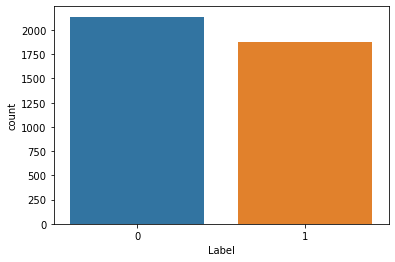

In [16]:
sns.countplot(df['Label'])

### Using TFIDF Vectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Headline']).toarray()

In [18]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
Y=df["Label"]

In [20]:
Y.value_counts()

0    2137
1    1872
Name: Label, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=21)

### Build and train neural networks

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [23]:

nn = Sequential()

nn.add(Dense(256,input_dim=xtrain.shape[1],activation='relu'))
nn.add(Dropout(0.6))

nn.add(Dense(128,activation='relu'))
nn.add(Dropout(0.6))

nn.add(Dense(1,activation='sigmoid'))

In [24]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1833472   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,866,497
Trainable params: 1,866,497
Non-trainable params: 0
_________________________________________________________________


In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [26]:
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
hist = nn.fit(xtrain, ytrain,
              validation_split=0.2,
              batch_size=8,
              epochs=100,
              callbacks=[early_stop])

Epoch 1/100
321/321 [==============================] - 34s 90ms/step - loss: 0.5997 - accuracy: 0.6589 - val_loss: 0.3941 - val_accuracy: 0.8255
Epoch 2/100
321/321 [==============================] - 26s 80ms/step - loss: 0.2527 - accuracy: 0.9010 - val_loss: 0.3430 - val_accuracy: 0.8505
Epoch 3/100
321/321 [==============================] - 24s 75ms/step - loss: 0.0906 - accuracy: 0.9684 - val_loss: 0.3767 - val_accuracy: 0.8411
Epoch 4/100
321/321 [==============================] - 24s 76ms/step - loss: 0.0266 - accuracy: 0.9938 - val_loss: 0.4409 - val_accuracy: 0.8551
Epoch 5/100
321/321 [==============================] - 25s 77ms/step - loss: 0.0111 - accuracy: 0.9973 - val_loss: 0.4803 - val_accuracy: 0.8505
Epoch 6/100
321/321 [==============================] - 24s 75ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.5165 - val_accuracy: 0.8505
Epoch 7/100
321/321 [==============================] - 24s 74ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.5599 - val_ac

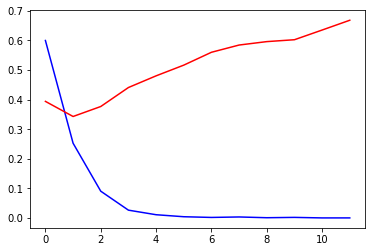

In [28]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],c='blue')
plt.plot(hist.history['val_loss'],c='red')

## Evaluate the model

In [29]:
nn.evaluate(xtrain,ytrain)

101/101 [==============================] - 5s 45ms/step - loss: 0.1338 - accuracy: 0.9698


[0.13378404080867767, 0.9697536826133728]

In [30]:
nn.evaluate(xtest, ytest)

26/26 [==============================] - 1s 46ms/step - loss: 0.6528 - accuracy: 0.8591


[0.6527928113937378, 0.8591022491455078]

In [31]:
probs = nn.predict(xtest)

26/26 [==============================] - 2s 45ms/step


In [32]:
probs[0:5]

array([[5.9436282e-08],
       [4.3755487e-02],
       [9.9914765e-01],
       [9.6606952e-01],
       [9.9274409e-01]], dtype=float32)

In [33]:
preds = []
for i in probs:
    if i>=0.5:
        preds.append(1)
    else:
        preds.append(0)

In [34]:
preds[0:5]

[0, 0, 1, 1, 1]

## Plot the confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest, preds)
cf

array([[384,  47],
       [ 66, 305]], dtype=int64)

<AxesSubplot:>

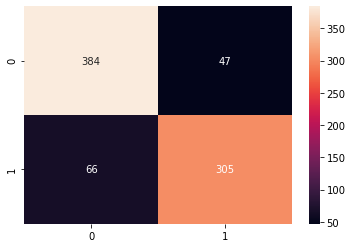

In [36]:
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')

## Check classification report

In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       431
           1       0.87      0.82      0.84       371

    accuracy                           0.86       802
   macro avg       0.86      0.86      0.86       802
weighted avg       0.86      0.86      0.86       802



## Conclusion

After implementing the project, the accuracy of 86% on the testing set, with precision,F1 score of 87 and 84.
The model performance in distinguishing between fake and real news.
The deployed application provided users with a reliable tool to evaluate the credibility of news articles
Thereby empowering them to make informed decisions and combat the spread of misinformation.